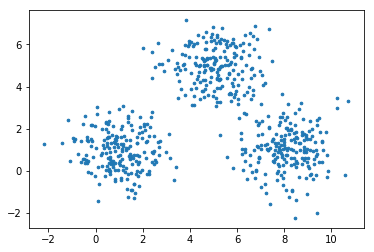

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
np.random.seed(1001)
data = np.concatenate((data_1, data_2, data_3), axis = 0)
plt.scatter(data[:,0], data[:,1],s=7)

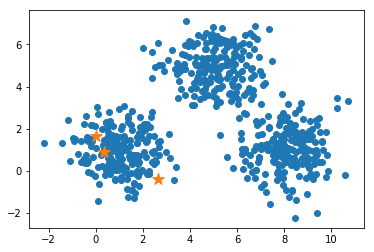

In [2]:
k=3
n=data.shape[0]
c=data.shape[1]
mean=np.mean(data)
std=np.std(data)
np.random.seed(1001)
centroids=np.random.randn(k,c)*std+mean
plt.scatter(data[:,0], data[:,1])
plt.scatter(centroids[:,0], centroids[:,1],marker='*',s=150)

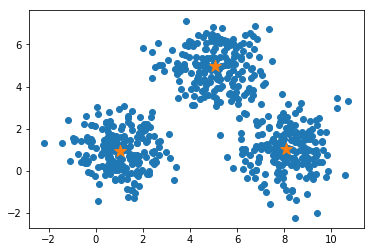

In [5]:
for i in range(1000):
    new_centroids=centroids.reshape(3,1,2)
    dist=(data-new_centroids)**2
    dist1=np.sum(dist,axis=2)
    dist2=np.sqrt(dist1)
    dist3=dist2.reshape(3,600,1)
    dist4=np.argmin(dist3,axis=0)
    clusters=dist4.reshape(600)
    clusters=pd.get_dummies(clusters)
    label=np.array(clusters)
    new_label=label.T
    new_label=new_label.reshape(3,600,1)
    label=np.sum(label,axis=0)
    label=label.reshape(3,1)
    new_data=data*new_label
    mean_val=np.sum(new_data,axis=1)
    new_mean=mean_val/label
    centroids=new_mean
plt.scatter(data[:,0], data[:,1])
plt.scatter(new_mean[:,0],new_mean[:,1],marker='*',s=150)